<a href="https://colab.research.google.com/github/subham129/Deep-learning/blob/main/Convolutional_Neural_Networks_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
def plt_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

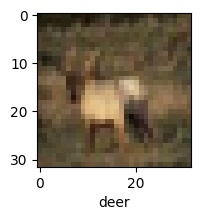

In [7]:
plt_sample(x_train,y_train,3)

In [8]:
x_train =  x_train/255
x_test = x_test/255

In [9]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8139 - accuracy: 0.3541
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6244 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5411 - accuracy: 0.4552
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4801 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4319 - accuracy: 0.4968
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3880 - accuracy: 0.5127
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3501 - accuracy: 0.5265
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3137 - accuracy: 0.5403
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2817 - accuracy: 0.5498
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [16]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5293 - accuracy: 0.4683


[1.5293484926223755, 0.4683000147342682]

In [14]:
cnn = keras.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4530 - accuracy: 0.4796
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1061 - accuracy: 0.6150
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9693 - accuracy: 0.6620
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8912 - accuracy: 0.6895
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8262 - accuracy: 0.7126
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7726 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7213 - accuracy: 0.7505
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6817 - accuracy: 0.7624
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6434 - accuracy: 0.7753
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - los

In [15]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9720 - accuracy: 0.6832


[0.9720172882080078, 0.6832000017166138]

In [17]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.36750037e-04, 3.05938156e-05, 2.24065036e-04, 5.57976127e-01,
        1.05376532e-02, 4.23097163e-01, 6.84818206e-03, 1.71465668e-04,
        6.54514646e-04, 2.34576728e-05],
       [8.29146523e-03, 1.30406236e-02, 1.43688585e-05, 5.57695046e-07,
        9.96999802e-07, 2.21032849e-07, 1.17364929e-09, 2.31523828e-07,
        9.78093982e-01, 5.57399937e-04],
       [6.34246990e-02, 1.87551394e-01, 5.62612480e-03, 5.51153682e-02,
        4.88579972e-03, 5.53985639e-03, 6.91594672e-04, 4.80148895e-03,
        3.67945135e-01, 3.04418504e-01],
       [7.93300509e-01, 1.34377135e-03, 8.02621432e-03, 1.10594602e-03,
        2.47890316e-03, 4.25744693e-05, 2.91690626e-03, 2.93625897e-04,
        1.89782098e-01, 7.09428394e-04],
       [2.12338909e-06, 3.67909388e-06, 9.73717310e-03, 3.84668671e-02,
        1.03689812e-01, 1.06730815e-02, 8.37346017e-01, 1.07869516e-06,
        7.50098334e-05, 5.11424787e-06]], dtype=float32)

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report: \n',classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.94      0.63      0.76      1000
           2       0.64      0.47      0.55      1000
           3       0.59      0.39      0.47      1000
           4       0.53      0.79      0.64      1000
           5       0.57      0.63      0.60      1000
           6       0.70      0.80      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.81      0.82      0.82      1000
           9       0.66      0.87      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

